# Swissroads Project: 08 - Convulational network  

## General presentation
This is the first notebook of the Swissroad classification project. The aim of this project is to construct several classifiers to identify vehicles photographied in the streets around the Swiss School: EPFL. The project will be split into 9 jupyter notebook, each performing a specific task.
Our dataset comprises color photographies of 6 different types of vehicles: 
* Bikes
* Cars 
* Motorcycles
* Trucks 
* Vans 
* Others (for example, buses, scooters, etc.) 
Our data is already split into a train, validation and test set, with respectively: 280, 139 and 50 images of sizes 250x250. 
This is a relatively small dataset. When state of the art models trained for similar tasks on larger datasets are already documented and available, a beneficial option is to use one of these pre-trained model on our own dataset, either for classification purposes directly, or as a way of extracting features from the deep layers to inject these features in other machine learning models. This option is beneficial as it allows us to benefit from information obtained on a very large dataset and allows us to save time, as training complex convolutional networks is computationally expensive and can be very time consuming especially on a personal computer. 

For this project, we will use the Inception_v3 model available on the tensorflow hub to extract the 2048 most important features and use them in different classifiers: 
* A k-nearest neighbors classifiers
* A simple decision tree
* A logistic regression model
* Non linear classifiers such as Random Forest and SVMs 
* A dense network

Finally, we will also attempt to achieve the same level of accuracy by training our own convolutional network from scratch on our specific dataset.


## Aim of this notebook 

The goal of this notebook is to summarize the results of all machine learning methods that were applied to this dataset. In addition, we will also compute a base model to evaluate all models. This base model will be computed by taking the modal value of the training set (training + validation set) as our predictions. 

In [1]:
# loading libraries

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import OrdinalEncoder


In [2]:
# loading data
# Load data
with np.load('data/train.npz', allow_pickle=False) as npz_file:
    X_tr = npz_file['features']
    y_tr = npz_file['targets']
    names_tr = npz_file['names']
    
with np.load('data/valid.npz', allow_pickle=False) as npz_file:
    X_val = npz_file['features']
    y_val = npz_file['targets']
    names_val = npz_file['names']
    
with np.load('data/test.npz', allow_pickle=False) as npz_file:
    X_te = npz_file['features']
    y_te = npz_file['targets']
    names_te = npz_file['names']
    

In [3]:
# Compute distribution on training set: 

pd.Series(np.concatenate((y_tr, y_val))).value_counts(normalize=True)

bike          0.236277
car           0.229117
motorcycle    0.181384
truck         0.150358
other         0.114558
van           0.088305
dtype: float64

In [4]:
from sklearn.dummy import DummyClassifier  

# Create the dummy classifier 

dummy = DummyClassifier(strategy='most_frequent')

#Fit 
dummy.fit(None, np.concatenate((y_tr, y_val)))

# Compute the test accuracy

base_accuracy = dummy.score(None, y_te)
print('Base Accuracy Accuracy: {:.2f}'.format(base_accuracy))

Base Accuracy Accuracy: 0.24


The Base accuracy is only 24%. Now, we can load the results of all previous jupyter notebooks to display all results on a barchart.  

In [5]:
# loading previous results

with np.load('results/01_knn.npz', allow_pickle=False) as npz_file:
    knn = npz_file['test_accuracy'].tolist()
with np.load('results/02_tree.npz', allow_pickle=False) as npz_file:
    tree = npz_file['test_accuracy'].tolist()
with np.load('results/03_tree-pca.npz', allow_pickle=False) as npz_file:
    tree_pca = npz_file['test_accuracy'].tolist()
with np.load('results/04_logistic_regression.npz', allow_pickle=False) as npz_file:
    logit = npz_file['test_accuracy'].tolist()
with np.load('results/05_random_forest.npz', allow_pickle=False) as npz_file:
    rf = npz_file['test_accuracy'].tolist()
with np.load('results/06_linear_svm.npz', allow_pickle=False) as npz_file:
    svm_linear = npz_file['test_accuracy'].tolist()
with np.load('results/07_one_layer_dense.npz', allow_pickle=False) as npz_file:
    net_one = npz_file['test_accuracy'].tolist()
with np.load('results/07_rbf_svm.npz', allow_pickle=False) as npz_file:
    svm_rbf = npz_file['test_accuracy'].tolist()
with np.load('results/08_two_layer_dense.npz', allow_pickle=False) as npz_file:
    net_two = npz_file['test_accuracy'].tolist()
with np.load('results/09_CNN.npz', allow_pickle=False) as npz_file:
    cnn = npz_file['test_accuracy'].tolist()

In [6]:
all_results = pd.DataFrame({'base' : [base_accuracy *100], 
                            'tree' : [tree*100], 
                            "pca + tree" : [tree_pca*100], 
                            'logistic regression' : [logit*100], 
                            'random forest' : [rf*100], 
                            'linear svm' : [svm_linear*100], 
                            'rbf svm' : [svm_rbf*100], 
                            'NN-1-layer' : [net_one*100], 
                            'NN-2-layer' : [net_two*100], 
                            'naive CNN' : [cnn*100]
                           }, index = ['test_accuracy']).T

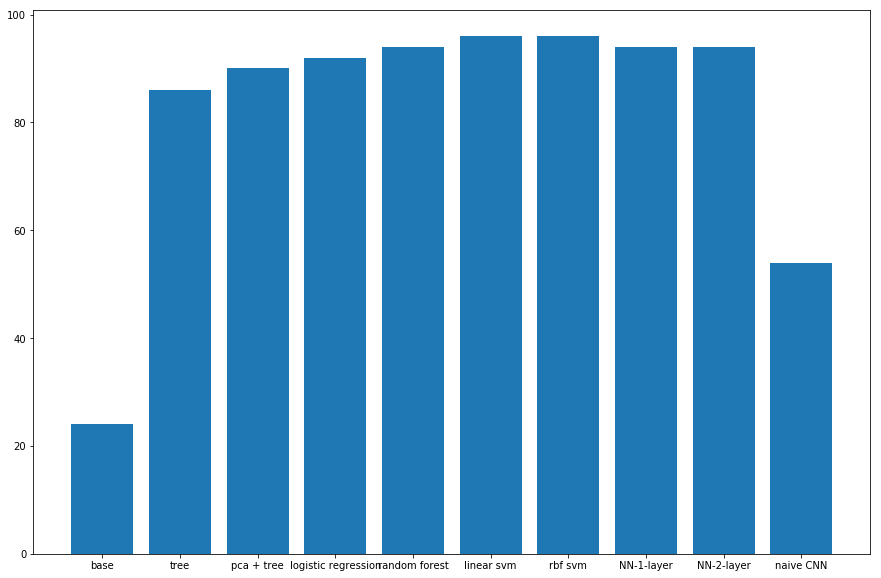

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
plt.bar(x =all_results.index , height = all_results['test_accuracy'])
plt.show()
        
        

As we can see on the figure above, all of our models performed better than the base model consisting as using the modal value for all predictions. Excluding the base, the worst model was the naive convolutional network, with a performance of only 54% accuracy. All other methods performed pretty similarly with an accuracy near 90% or better. 
The best performing model for us was the liear and rbf kernel svms which performed similarly with a 94% test accuracy. 

As discussed in the CNN notebook, the lack of performance of the naive convolutional network can be explained by several things: All other models (excluding the base model), were performed on features extracted on a well known pretrained CNN, the inception_v3 CNN. Even if this CNN was not specifically trained for this task only, it was trained on a much larger dataset. In addition, its architecture is a well documented one that has proved to be efficient on image classification tasks. Finally, the pretrained CNN beneficiated of a much better computer power than a personal computer, allowing it to be trained for a much larger number of parameters than what was feasible for us. 

All of this contributed to show that when trying to fit a CNN, if possible, using a pretrained model is much more efficient than creating a new one from scratch. However, if not possible, creating a CNN from scratch is still better than using a base model. 